In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


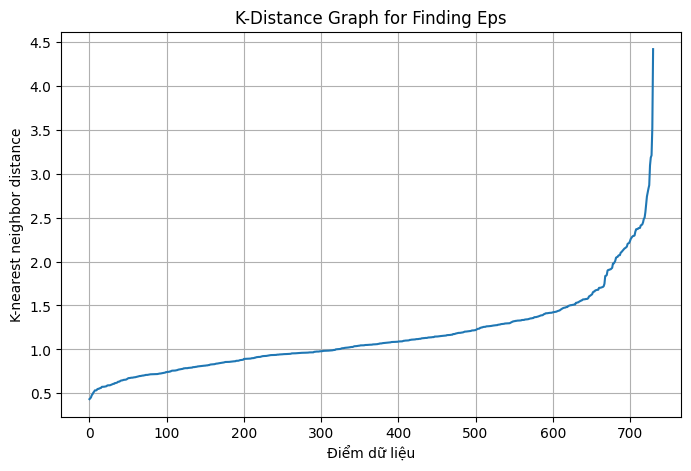

Số cụm tìm thấy: 24
Số điểm nhiễu: 476


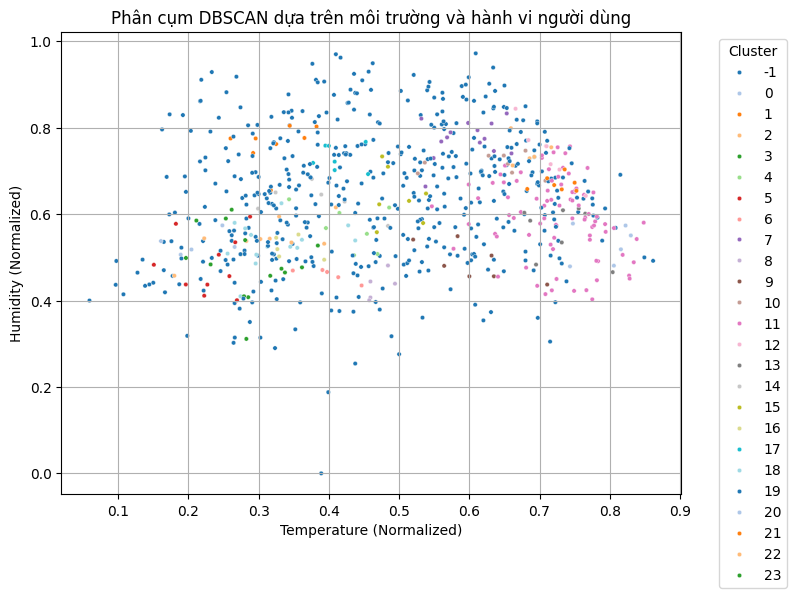

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Đọc dữ liệu từ file CSV
file_path = r"C:\Users\PC\Documents\UEH\KPDL\bike+sharing+dataset\day.csv"
df = pd.read_csv(file_path)

# Chọn các thuộc tính liên quan đến môi trường và hành vi người dùng
features = ["temp", "atemp", "hum", "windspeed", "weathersit", "holiday", "weekday", "workingday", "season"]
data = df[features]

# Chuẩn hóa dữ liệu để đưa về cùng thang đo
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# === BƯỚC 1: Xác định giá trị Eps bằng biểu đồ k-distance ===
k = 5  # Chọn k = minPts (thường bằng 2 * số chiều dữ liệu)
nbrs = NearestNeighbors(n_neighbors=k).fit(data_scaled)
distances, indices = nbrs.kneighbors(data_scaled)

# Sắp xếp khoảng cách theo thứ tự tăng dần để tìm điểm "khuỷu" (elbow point)
distances = np.sort(distances[:, k - 1])

# Vẽ biểu đồ k-distance để tìm Eps
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel("Điểm dữ liệu")
plt.ylabel("K-nearest neighbor distance")
plt.title("K-Distance Graph for Finding Eps")
plt.grid(True)
plt.show()

# === BƯỚC 2: Áp dụng DBSCAN với giá trị Eps tối ưu ===
eps_value = 0.8  
min_samples = 5 

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples)
df["cluster"] = dbscan.fit_predict(data_scaled)

# Đếm số cụm và số điểm nhiễu
num_clusters = len(set(df["cluster"])) - (1 if -1 in df["cluster"].values else 0)
num_noise = list(df["cluster"]).count(-1)

print(f"Số cụm tìm thấy: {num_clusters}")
print(f"Số điểm nhiễu: {num_noise}")

# === BƯỚC 3: Trực quan hóa kết quả phân cụm ===
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["temp"], y=df["hum"], hue=df["cluster"], palette="tab20", s=10)
plt.xlabel("Temperature (Normalized)")
plt.ylabel("Humidity (Normalized)")
plt.title("Phân cụm DBSCAN dựa trên môi trường và hành vi người dùng")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
